In [170]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from skimage import io
import time

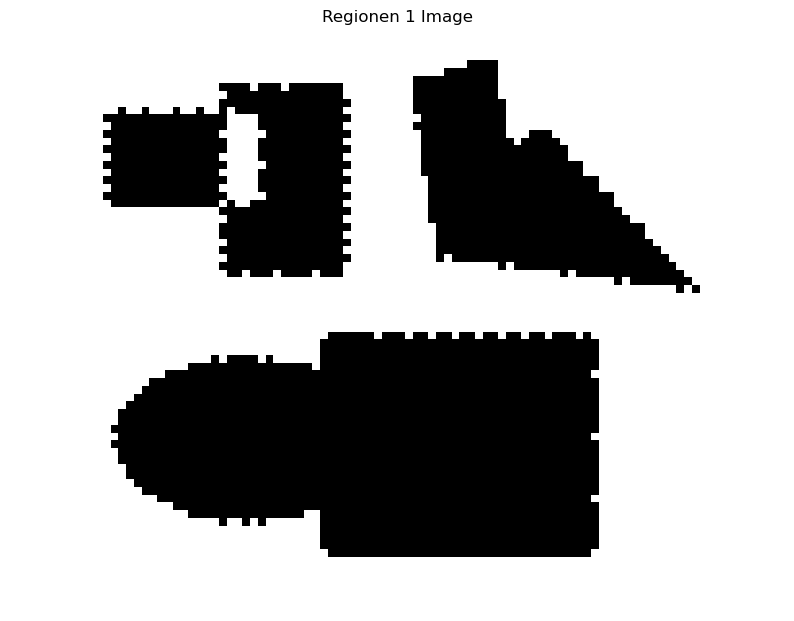

In [221]:
image = io.imread('regionen1.png')

plt.figure(figsize=(10, 10))
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title('Regionen 1 Image')
plt.show()

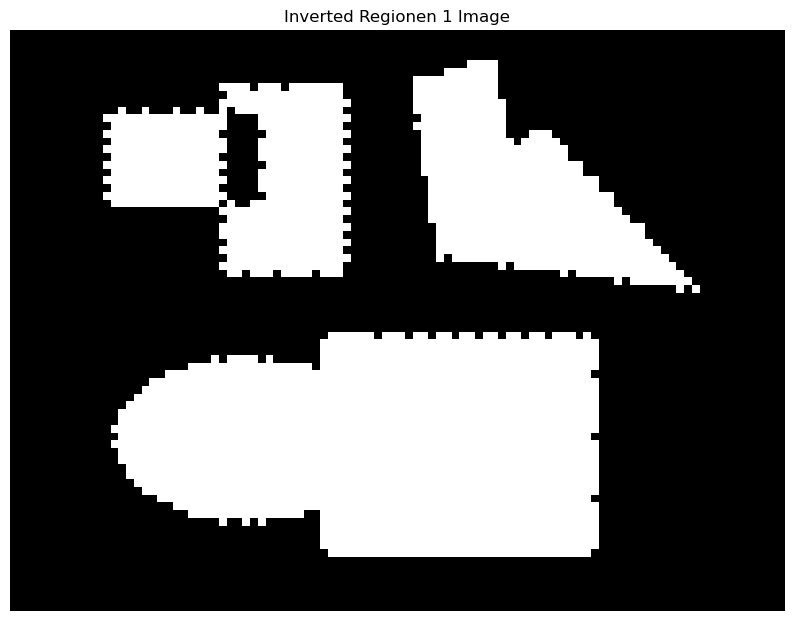

In [222]:
image = image[:, :, 0] 
image = 255 - image
image = np.where(image > 0, 1, 0)
plt.figure(figsize=(10, 10))
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title('Inverted Regionen 1 Image')
plt.show()

In [145]:
def display_colored_image(image):
    image = np.array(image)
    unique_vals = np.unique(image)
    
    # Create a mapping from each unique value to an integer index
    val_to_index = {val: i for i, val in enumerate(unique_vals)}
    
    # Map the image values to indices
    indexed_image = np.vectorize(val_to_index.get)(image)
    
    # Pick a colormap that supports many distinct colors
    cmap = plt.get_cmap('tab20', len(unique_vals))  # e.g., 'nipy_spectral', 'hsv', 'tab20', 'turbo'
    
    # Show the image
    plt.imshow(indexed_image, cmap=cmap)
    plt.axis('off')
    plt.show()

48
[{0}, {2}, {3}, {4}, {5}, {6}, {7}, {8}, {9}, {10}, {11}, {12}, {13}, {14}, {15}, {16}, {17}, {18}, {19}, {20}, {21}, {22}, {23}, {24}, {25}, {26}, {27}, {28}, {29}, {30}, {31}, {32}, {33}, {34}, {35}, {36}, {37}, {38}, {39}, {40}, {41}, {42}, {43}, {44}, {45}, {46}, {47}, {48}, {49}, {50}, {51}, {52}, {53}]
[{0}, {16, 2, 3, 4, 18, 14}, {5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29}, {30}, {31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53}]
[{0}, {16, 2, 3, 4, 18, 14}, {5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29}, {30}, {31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53}]


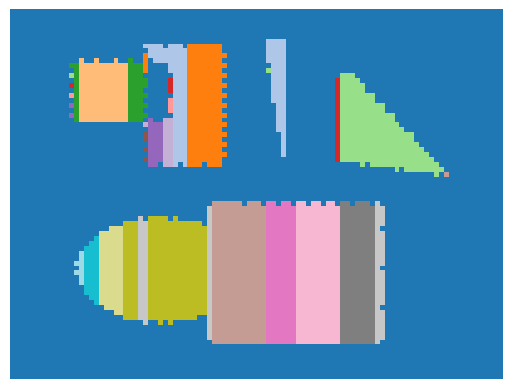

53
53


In [ ]:


def sequential_labelling(image):
    sequential_processing = 0
    label = 2
    collisions = set()
    x, y = image.shape
    for v in range(x):
        for u in range(y):
            if image[v, u] == 1:
                count = sum([
                image[v-1, u] > 1,
                image[v, u-1] > 1,
                image[v, u+1] > 1,
                image[v+1, u] > 1
                ])
                if count == 0:
                    image[v, u] = label
                    if (sequential_processing):
                        display_colored_image(image)
                        print("labeled " + str(v) + ", " + str(u) + " with label " + str(label) + " with no neighbors")
                    label += 1

                
                elif count == 1:
                    if image[v+1, u] > 1:
                        image[v, u] = image[v+1, u]
                        if (sequential_processing):
                            display_colored_image(image)
                            print("labeled " + str(v) + ", " + str(u) + " with label " + str(image[v+1, u]) + " with one neighbors")
                    elif image[v-1, u] > 1:
                        image[v, u] = image[v-1, u]
                        if (sequential_processing):
                            display_colored_image(image)
                            print("labeled " + str(v) + ", " + str(u) + " with label " + str(image[v-1, u]) + " with one neighbors")
                    elif image[v, u-1] > 1:
                        image[v, u] = image[v, u-1]
                        if (sequential_processing):
                            display_colored_image(image)
                            print("labeled " + str(v) + ", " + str(u) + " with label " + str(image[v, u-1]) + " with one neighbors")
                    elif image[v, u+1] > 1:
                        image[v, u] = image[v, u+1]
                        if (sequential_processing):
                            display_colored_image(image)
                            print("labeled " + str(v) + ", " + str(u) + " with label " + str(image[v, u+1]) + " with one neighbors")
                                
                else:
                    labeling = 0
                    if image[v-1, u] > 1:
                        image[v, u] = labeling = image[v-1, u]
                        if (sequential_processing):
                            display_colored_image(image)
                            print("labeled " + str(v) + ", " + str(u) + " with label " + str(labeling) + " with multiple neighbors")
                    elif image[v, u-1] > 1:
                        image[v, u] = labeling = image[v, u-1]
                        if (sequential_processing):
                            display_colored_image(image)
                            print("labeled " + str(v) + ", " + str(u) + " with label " + str(labeling) + " with multiple neighbors")
                    elif image[v, u+1] > 1:
                        image[v, u] = labeling = image[v, u+1]
                        if (sequential_processing):
                            display_colored_image(image)
                            print("labeled " + str(v) + ", " + str(u) + " with label " + str(labeling) + " with multiple neighbors")
                    if image[v, u-1] > 1 and image[v, u-1] != labeling:
                        collisions.add((image[v, u-1], image[v, u]))
                    if image[v, u+1] > 1 and image[v, u+1] != labeling:
                        collisions.add((image[v, u+1], image[v, u]))
                    if image[v+2, u] > 1 and image[v+2, u] != labeling:
                        collisions.add((image[v+2, u], image[v, u]))


    print(len(collisions))
    unique_entries= np.unique(image)
    labellings = list()
    for i in range(len(unique_entries)):
        a = set()
        a.add(unique_entries[i])
        labellings.append(a)
    print(labellings)
    for i in range(len(collisions)):
        a = collisions.pop()
        
        for j in range(len(labellings)):
            if a[0] in labellings[j]:
                one = j
            if a[1] in labellings[j]:
                two = j
        labellings[one] = labellings[one].union(labellings[two])
        labellings.remove(labellings[two])

    print(labellings)
                
    for v in range(x):
        for u in range(y):
            if image[v, u] > 1:
                for i in range(len(labellings)):
                    if image[v, u] in labellings[i]:
                        image[v, u] = min(labellings[i])


                



copied_image = image.copy()
sequential_labelling(copied_image)
display_colored_image(copied_image)
print(copied_image.max())
#get unique entries of array copied_image
unique_entries = np.unique(copied_image)
print(unique_entries.size)
                    

In [ ]:
print("labeled " + v + ", " + u + " with label " + str(label))
time.sleep(200)